<a href="https://colab.research.google.com/github/DiGyt/snippets/blob/master/Langevin_Fokker_Planck.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Brownian Motion and Equations

Brownian motion is a natural phenomenon observed in various systems, such as the random movement of pollen grains suspended in water. It has broad applications in physics, biology, finance, and more. Two mathematical tools, the Langevin and Fokker-Planck Equations, provide insights into the behavior of particles undergoing Brownian motion.
## Brownian Motion Basics

Imagine a tiny pollen grain suspended in water. Even though the water molecules are constantly colliding with the grain, the grain's movement appears erratic and unpredictable. This phenomenon, called Brownian motion, is the result of countless molecular collisions. The Langevin and Fokker-Planck Equations help us understand and describe this seemingly chaotic behavior.
## The Langevin Equation

The Langevin Equation connects Newton's Second Law with random forces to describe the motion of particles experiencing Brownian motion. It takes into account the particle's mass, friction, and random forces.

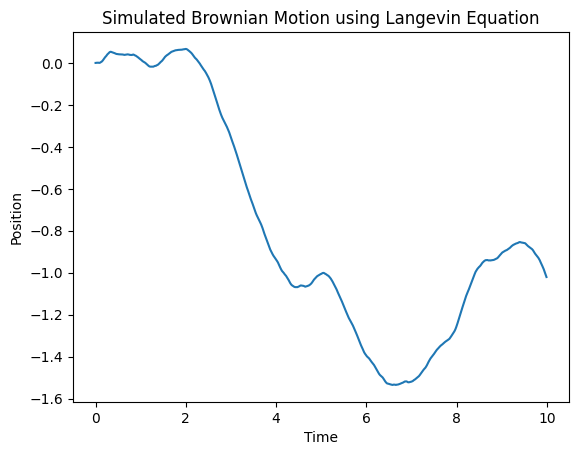

In [1]:
# Langevin Equation: m * d^2x/dt^2 = -γ * dx/dt + ξ(t)
# m: Particle mass, γ: Friction coefficient, ξ(t): Random force

import numpy as np
import matplotlib.pyplot as plt

def langevin_equation(m, gamma, dt, num_steps):
    x = np.zeros(num_steps)
    v = np.zeros(num_steps)

    for i in range(1, num_steps):
        xi = np.random.normal(0, np.sqrt(2 * gamma * m / dt))  # Random force
        a = -gamma * v[i - 1] / m + xi / m
        v[i] = v[i - 1] + a * dt
        x[i] = x[i - 1] + v[i] * dt

    return x

m = 1.0  # Particle mass
gamma = 0.1  # Friction coefficient
dt = 0.01  # Time step
num_steps = 1000

x = langevin_equation(m, gamma, dt, num_steps)

plt.plot(np.arange(num_steps) * dt, x)
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Simulated Brownian Motion using Langevin Equation')
plt.show()

This code simulates Brownian motion using the Langevin Equation, showing how a particle's position changes over time due to random forces.

# Fokker-Planck Equation
Introduction to the Fokker-Planck Equation

The Fokker-Planck Equation is a partial differential equation that describes the time evolution of probability distributions for particles undergoing stochastic processes like Brownian motion. It provides a mathematical framework to study how the distribution of particle positions changes over time due to random forces.
## Connection between Langevin and Fokker-Planck Equations

The Fokker-Planck Equation is intimately connected to the Langevin Equation. In fact, the Fokker-Planck Equation can be derived from the Langevin Equation, and it offers a more convenient way to analyze the probability distributions associated with Brownian motion.
## Drift and Diffusion Terms in the Fokker-Planck Equation

The Fokker-Planck Equation consists of two key terms: the drift term and the diffusion term. The drift term represents the deterministic motion of particles due to forces like friction, while the diffusion term captures the stochastic nature of the motion caused by random forces.

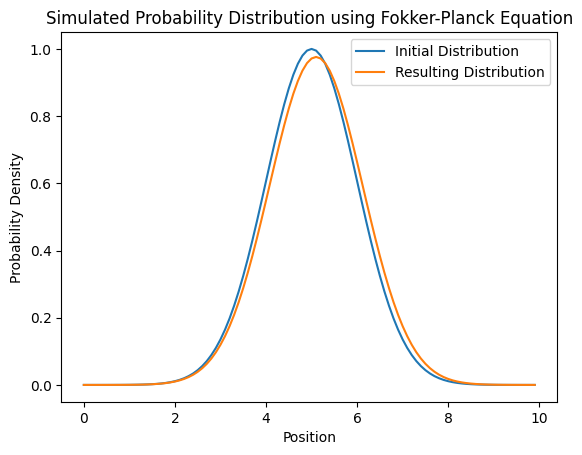

In [2]:
# Fokker-Planck Equation: ∂p/∂t = -∇(μp) + (D/2)∇^2p
# p(x, t): Probability density, μ(x, t): Drift velocity, D(x, t): Diffusion coefficient

def fokker_planck(p, mu, D, dt, dx, num_steps):
    new_p = np.zeros_like(p)

    for _ in range(num_steps):
        # Calculate drift and diffusion terms
        drift_term = -np.gradient(mu * p, dx)
        diffusion_term = (D / 2) * np.gradient(np.gradient(p, dx), dx)

        # Update probability density using discretized Fokker-Planck Equation
        new_p = p + dt * (drift_term + diffusion_term)
        p = new_p

    return p

mu = 0.1  # Drift velocity
D = 0.05  # Diffusion coefficient
dt = 0.01  # Time step
dx = 0.1  # Spatial step
num_steps = 100

initial_p = np.exp(-((np.arange(0, 10, dx) - 5) ** 2) / 2)
resulting_p = fokker_planck(initial_p, mu, D, dt, dx, num_steps)

plt.plot(np.arange(0, 10, dx), initial_p, label='Initial Distribution')
plt.plot(np.arange(0, 10, dx), resulting_p, label='Resulting Distribution')
plt.xlabel('Position')
plt.ylabel('Probability Density')
plt.title('Simulated Probability Distribution using Fokker-Planck Equation')
plt.legend()
plt.show()

This code simulates the evolution of a probability distribution using the Fokker-Planck Equation. The initial distribution (Gaussian) evolves over time due to drift and diffusion processes.

In the next section, we'll move on to simulating and visualizing probability distributions, showcasing how the distribution changes over time.

# Simulating and Visualizing Probability Distributions
## Code to Simulate Brownian Motion and Calculate Distributions

To gain further insight into how the probability distribution evolves over time, we can simulate Brownian motion using the Langevin Equation and then calculate position probability distributions at different time steps.

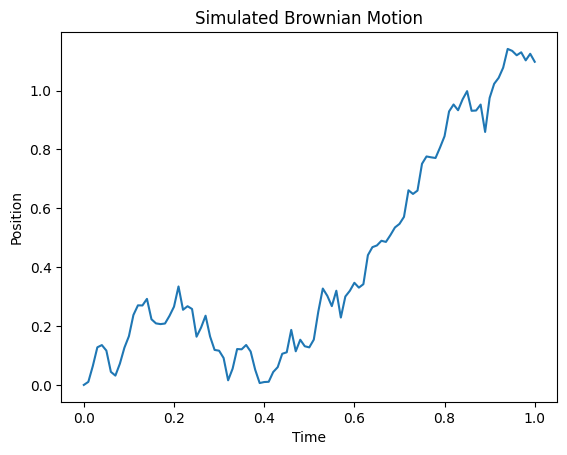

In [3]:
# Simulating Brownian motion and calculating probability distributions

def simulate_brownian_motion(initial_position, num_steps, dt, diffusion_coefficient):
    positions = [initial_position]
    for _ in range(num_steps):
        delta_position = np.random.normal(scale=np.sqrt(2 * diffusion_coefficient * dt))
        new_position = positions[-1] + delta_position
        positions.append(new_position)
    return positions

initial_position = 0.0
num_steps = 100
dt = 0.01
diffusion_coefficient = 0.1

positions = simulate_brownian_motion(initial_position, num_steps, dt, diffusion_coefficient)

plt.plot(np.arange(0, num_steps+1) * dt, positions)
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Simulated Brownian Motion')
plt.show()

## Plotting Histograms to Visualize Distributions

Next, we can calculate position probability distributions at different time steps and visualize them using histograms.

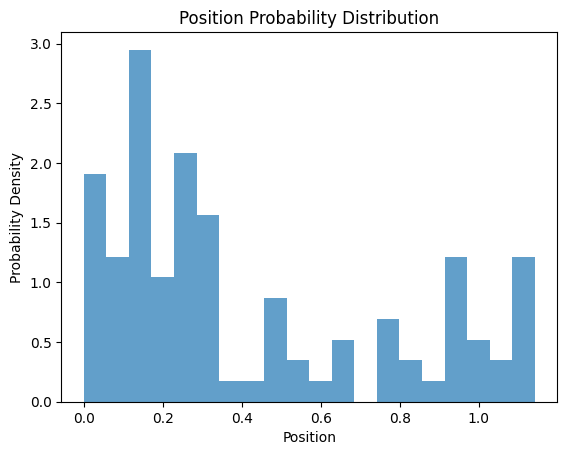

In [4]:
# Calculating and visualizing position probability distributions

def plot_position_histogram(positions, num_bins):
    plt.hist(positions, bins=num_bins, density=True, alpha=0.7)
    plt.xlabel('Position')
    plt.ylabel('Probability Density')
    plt.title('Position Probability Distribution')
    plt.show()

num_bins = 20

plot_position_histogram(positions, num_bins)

## Discussion of Distribution Changes Over Time

As we observe the simulated Brownian motion and its corresponding probability distributions, we can see how the distribution becomes broader and smoother over time. The central tendency of the distribution remains around the initial position, but the uncertainty and spread increase.

Comparison and Interpretation
Side-by-Side Comparison of Langevin and Fokker-Planck Equations

Let's compare the Langevin and Fokker-Planck Equations side by side:

Langevin Equation:

$m * d^2x/dt^2 = -γ * dx/dt + η(t)$

Fokker-Planck Equation:


$∂P(x, t)/∂t = -∂(A(x) * P(x, t))/∂x + (B(x)^2 / 2) * ∂^2P(x, t)/∂x^2$


## Interpretation of the Relationship

The Langevin Equation provides a dynamic description of particle motion, incorporating both deterministic forces (drag and friction) and stochastic noise (random fluctuations). On the other hand, the Fokker-Planck Equation describes how the probability density function of particle positions changes over time, taking into account drift and diffusion terms.
## Explanation of How the Fokker-Planck Equation Describes Distribution Evolution

The Fokker-Planck Equation captures how the probability distribution of particle positions evolves over time due to drift and diffusion. The drift term, represented by A(x), indicates the direction in which particles tend to move, while the diffusion term, represented by B(x), accounts for the spread of the distribution. The equation highlights how the distribution smoothens out over time, emphasizing regions where particles are more likely to be found.

# Real-World Applications
## Examples of Langevin and Fokker-Planck Equations in Different Fields
### Physics:

Langevin and Fokker-Planck Equations find applications in understanding Brownian motion of particles in fluids, molecular dynamics simulations, and modeling diffusion processes.
### Biology:

These equations are used to model the movement of biological cells, such as the motion of bacteria or cell migration in tissues. They also play a role in studying the behavior of biomolecules and the spread of diseases.
### Finance:

Langevin and Fokker-Planck Equations are employed to model stock price movements, market volatility, and the dynamics of financial systems.
## Brief Discussion of Limitations and Extensions

While Langevin and Fokker-Planck Equations provide valuable insights, they do have limitations. For instance, they assume that the dynamics are Markovian and ignore memory effects. Extensions involve considering non-Gaussian noise sources, higher-order terms, and incorporating memory effects for more accurate modeling.

Conclusion

In this Jupyter Notebook, we embarked on a journey to explore the fascinating world of Langevin and Fokker-Planck Equations. Here's a quick summary of our key takeaways and insights:

1. Langevin Equation: We introduced the Langevin Equation, a stochastic differential equation that captures the motion of particles subject to random forces. We saw how it models Brownian motion and described its components: the deterministic force and the stochastic noise.

2. Fokker-Planck Equation: We delved into the Fokker-Planck Equation, a partial differential equation derived from the Langevin Equation. It provides a probability distribution function that describes the evolution of a system's state over time.

3. Simulation and Visualization: We simulated Brownian motion and calculated position probability distributions using Python. By plotting histograms, we visualized how the distribution changes over time, illustrating the concept of diffusion.

4. Comparison and Interpretation: We compared the Langevin and Fokker-Planck Equations side by side, highlighting their relationship. We interpreted how the Fokker-Planck Equation describes the dynamics of probability distributions, capturing the interplay between drift and diffusion.

5. Real-World Applications: We explored diverse applications of Langevin and Fokker-Planck Equations across physics, biology, and finance. We discussed their role in modeling various systems and processes, shedding light on real-world phenomena.

6. Limitations and Extensions: We touched on the limitations of these equations, including their Markovian assumption and memory effects. We hinted at extensions involving non-Gaussian noise and higher-order terms for more accurate modeling.

As we conclude our exploration, we encourage you to continue your journey into the realm of stochastic processes, differential equations, and their applications. Dive deeper into the literature, experiment with different scenarios, and explore how these concepts can unlock insights across various fields.

Thank you for joining us on this exploration. Happy learning, experimenting, and discovering!

Feel free to save and share this notebook to revisit and continue your exploration in the future.